## OECD Term Matching

#### Author: Cierra Oliveira

#### Date: 6/21/2021

#### Importing libraries and data

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import gensim
import time
import seaborn as sns

In [60]:
import collections
from wordcloud import WordCloud

In [2]:
df = pd.read_pickle("/home/dab3dj/git/dspg21RnD/data/dspg21RnD/final_dataset_7-20.pkl")

df.reset_index(inplace = True)

#### Creating core and non-core query words
##### Source: OECD Selected list of AI key term

In [4]:
core_terms = ["adaboost","artificial intelligence","artificial neural network","back propagation"
,"back propagation neural network","computational intelligence","computer vision"
,"convolutional neural network","deep belief network","deep convolutional neural network"
,"deep learn","deep neural network","elman network","elman neural network"
,"expert system","fee forward neural network","inference engine","machine intelligence"
,"machine learn","machine translation","machine vision","multilayer neural network"
,"natural language process","perceptron","random forest","rbf neural network","recurrent neural network"
,"self organize map","spike neural network","supervise learn","support vector machine"
,"svm classifier","unsupervised learn","artificial_intelligence","artificial_neural_network","back_propagation"
,"back_propagation_neural_network","computational_intelligence","computer_vision"
,"convolutional_neural_network","deep_belief_network","deep_convolutional_neural_network"
,"deep_learn","deep_neural_network","elman_network","elman_neural_network"
,"expert_system","fee_forward_neural_network","inference_engine","machine_intelligence"
,"machine_learn","machine_translation","machine_vision","multilayer_neural_network"
,"natural_language_process","random_forest","rbf_neural_network","recurrent_neural_network"
,"self_organize_map","spike_neural_network","supervise_learn","support_vector_machine"
,"svm_classifier","unsupervised_learn"]

In [5]:
noncore_terms = ["actor critic", "analog vlsi", "associative memory", "autonomous vehicle", "bayes classifer",
"bayesian belief network", "bioinformatics", "camera calibration", "collaborative system",
"commonsense reason", "computational biology", "datum mine", "decision tree", "description logic",
"dimensionality reduction", "discriminant analysis", "fuzzy logic", "gene ontology", "hide markov model",
"humanoid", "image alignment", "image match", "information retrieval", "kegg pathway", "knowledge base", 
"knowledge representation and reason", "linear discriminant", "markov decision process",
"mulitclass classification", "naive bayes", "name entity recognition", "near neighbor classifier", 
"neural network", "neuro fuzzy", "neuromorphic compute", "neuromorphic hardware", "non rigid registration", 
"nonmonotonic reason", "object recognition", "opinion mine", "optimal search", "pattern analysis", 
"pattern recognition", "person re identification", "principal component analysis", "question answer", "radial basis function",
"rbf kernel", "reinforcement learn", "rigid registration", "robot", "sarsa", "sensor datum fusion", 
"sensor network", "speech recognition", "stereo match", "symbolic reason", "system and control theory",
"template match", "text categorization", "text mine", "text summarization", "word sense disambiguation",
"actor_critic", "analog_vlsi", "associative_memory", "autonomous_vehicle", "bayes_classifer",
"bayesian_belief_network", "camera_calibration", "collaborative_system",
"commonsense_reason", "computational_biology", "datum_mine", "decision_tree", "description_logic",
"dimensionality_reduction", "discriminant_analysis", "fuzzy_logic", "gene_ontology", "hide_markov_model",
"image_alignment", "image_match", "information_retrieval", "kegg_pathway", "knowledge_base", 
"knowledge_representation_and_reason", "linear_discriminant", "markov_decision_process",
"mulitclass_classification", "naive_bayes", "name_entity_recognition", "near_neighbor_classifier", 
"neural_network", "neuro_fuzzy", "neuromorphic_compute", "neuromorphic_hardware", "nonrigid_registration", 
"nonmonotonic_reason", "object_recognition", "opinion_mine", "optimal_search", "pattern_analysis", 
"pattern_recognition", "person_reidentification", "principal_component_analysis", "question_answer", "radial_basis_function",
"rbf_kernel", "reinforcement_learn", "rigid_registration", "sensor_datum_fusion", 
"sensor_network", "speech_recognition", "stereo_match", "symbolic_reason", "system_and_control_theory",
"template_match", "text_categorization", "text_mine", "text_summarization", "word_sense_disambiguation"]

In [ ]:
# import os
# os.getcwd()

In [24]:
# myPath = os.getcwd()
# file_name= "/sfs/qumulo/qhome/dab3dj/git/dspg21RnD/data/dspg21RnD/noncore_terms.pkl"
# open_file = open(file_name, "wb")
# pickle.dump(noncore_terms, open_file)
# open_file.close()

#### Classifying 

In [11]:
def term_match(list):
    matched_words = []
    core_count = 0
    noncore_count =0
    for word in list:
        if word in core_terms:
            core_count+=1
            matched_words.append(word)
        if word in noncore_terms:
            noncore_count+=1
            matched_words.append(word)
    if (core_count >= 1 or noncore_count >= 2):
        return matched_words
    else:
        return False
        

In [18]:
df_classified = df

In [19]:
df_classified['IS_AI']=df_classified['final_frqwds_removed'].apply(term_match)

In [20]:
ai = df_classified[df_classified["IS_AI"]!=False]

In [25]:
print(ai.shape)
print(df.shape)

(2224, 41)
(690814, 41)


-----------------------------------------------------------------------

### Percent of Abstracts Classified as AI with OECD Key Terms:
* 2224/690814
* ~0.32%

---

### Find most popular words key terms in abstracts 

In [27]:
classified_terms = ai['IS_AI']

In [34]:
# convert list of words to set to remove duplicates
classified_terms = classified_terms.apply(set)
# convert back to list
classified_terms = classified_terms.apply(list)

In [54]:
classified_terms = classified_terms.apply(pd.Series).stack().reset_index(drop = True)

In [55]:
c = collections.Counter(classified_terms)
c.most_common(5)

[('robot', 1289),
 ('artificial_intelligence', 776),
 ('autonomous_vehicle', 112),
 ('convolutional_neural_network', 94),
 ('humanoid', 35)]

In [74]:
len(classified_terms.unique())

17

#### Generating Word Cloud

In [79]:
wordcloud = WordCloud(width = 800, height = 800,
                      min_font_size = 10, 
                      background_color ='white').generate(' '.join(classified_terms))

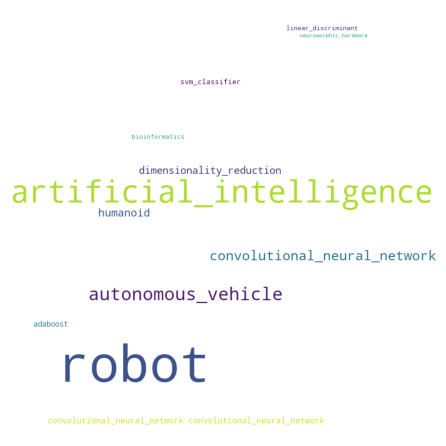

In [80]:
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Save classified dataframe

In [81]:
df_classified.to_csv("classified_abstracts.csv", index=False)